# A first example: enough water for a rose

In this notebook we consider a simple problem to compare how a simple problem can be approached both analytically (using calculus) and numerically (using mathematical optimization). In this course we will be mostly concerned about the second approach, having to deal with high-dimensional and complex problems for which analytical solutions are beyond reach.

In [1]:
# install Pyomo and solvers
import requests
import types

url = "https://raw.githubusercontent.com/mobook/MO-book/main/python/helper.py"
helper = types.ModuleType("helper")
exec(requests.get(url).content, helper.__dict__)

helper.install_pyomo()
helper.install_ipopt()

pyomo was previously installed
ipopt was previously installed


True

## Problem description

Suppose you have a single long-stemmed rose, but at home, there is only a glass of cylindrical shape to put it in. When you place the rose in the glass, it tumbles but you realize that adding water will help to keep the rose more stable. How much water should you add? Intuitively one would say fill up the glass, but that makes it just as unstable as it was in the beginning. There should be an ideal level of water that makes the glass with the rose the most stable. We know that the stability of an object is closely related to the height of its center of gravity, so we will analyze this quantity depending on the water level.

The empty glass has a diameter of $4$ (cm), height $20$ (cm), and mass $m_g=100$ (gr) and, ignoring the mass at its bottom, the height $h_g$ (in cm) of the center of gravity of the glass is at half of its total height, thus $h_g=10$. By homogeneity, a body of water that reaches height $x$ (in cm) when poured into the glass will have its center of gravity at height $h_w(x) = x/2$ and a total mass $m_w(x) = \pi r^2 h_w(x) = 4 \pi h_w(x)$ (in gr), where we used the fact that $1$ cubic cm of water weights $1$ gr.

The height $h(x)$ of the center of mass of the system glass-and-water does depend on the water level $x$ and can be determined using the equation

$$
        m_g h_g+ m_w(x) h_w(x) = (m_g+m_w(x)) h(x).
$$

Solving for $h(x)$ we obtain

$$
        h(x)=\frac{\pi  x^2+500}{2 \pi  x+50},
$$

which is plotted below as a function of $x$.

![hfunction_plot.png](/hfunction_plot.png)

![hfunction_plot.png](https://github.com/mobook/MO-book/blob/main/notebooks/01/hfunction_plot.png)

![hfunction_plot.pdf](/hfunction_plot.pdf)

![hfunction_plot.pdf](https://github.com/mobook/MO-book/blob/main/notebooks/01/hfunction_plot.pdf?raw=1)

As we can infer from the plot there is an optimum height $x^*$ of the water that brings the center of gravity as low as possible. We can find it by solving the following **constrained minimization problem**,

\begin{align*}
    \min \quad & h(x) \\
    \text{s.t.} \quad & 0 \leq x \leq 20,
\end{align*}

where the **objective function** is the height $h(x)$ and we added a **constraint** $0 \leq x \leq 20$ since the water level is nonnegative and cannot exceed the glass height.

## Analytical solution using sympy and math packages

Using standard calculus techniques, we can search *analytically* for such a minimum by finding the zero(s) of the first derivative of the function $h(x)$, i.e. by solving

$$
        h'(x) = \frac{\pi  \left(\pi  x^2+50 x-500\right)}{2 (\pi  x+25)^2} = 0.
$$

Of the two solutions obtained by solving the quadratic equation at the numerator, only one lies in the interval $[0,20]$ as desired, namely

$$
        x^*= \frac{5 \sqrt{25 + 20 \pi}-25}{\pi } \approx 6.958,
$$

hence just above one-third of the glass height, that is $20/3 \approx 6.667$. Inspecting the value of the second derivative of $h(x)$ at the point $x^*$ reveals that $h''(x^*)>0$, confirming that $x^*$ is indeed a minimum. The water level $x^* \approx 6.958$ is, using knowledge of physics, the one likely to make the glass most stable.Using standard calculus techniques, we can search *analytically* for such a minimum by finding the zero(s) of the first derivative of the function $h(x)$, i.e. by solving

$$
        h'(x) = \frac{\pi  \left(\pi  x^2+50 x-500\right)}{2 (\pi  x+25)^2} = 0.
$$

Of the two solutions obtained by solving the quadratic equation at the numerator, only one lies in the interval $[0,20]$ as desired, namely

$$
        x^*= \frac{5 \sqrt{25 + 20 \pi}-25}{\pi } \approx 6.958,
$$

hence just above one-third of the glass height, that is $20/3 \approx 6.667$. Inspecting the value of the second derivative of $h(x)$ at the point $x^*$ reveals that $h''(x^*)>0$, confirming that $x^*$ is indeed a minimum. The water level $x^* \approx 6.958$ is, using knowledge of physics, the one likely to make the glass most stable.

We can do these calculations in Python using the [sympy](https://www.sympy.org/en/index.html) and [math](https://docs.python.org/3/library/math.html) packages. We have two different options, depending on whether we want to treat $\pi$ as a number or as symbol.

### Treating $\pi$ as a number

In [2]:
import sympy
import math

# x is a symbol and pi is a number
x = sympy.Symbol('x')
pi = math.pi

# h(x) is a function of x, and hprime its derivative h'(x)
h = (4*pi*x**2 + 2000)/(8*pi*x+200)
hprime = sympy.diff(h, x)

# calculate the values of x that solve the equatioin h'(x)=0
sol = sympy.solveset(hprime, x)
sol.evalf(6)

{-22.8735, -7.95775, 6.95804}

The equation $h^\prime(x) = 0$ has two solutions in the domain $[0,20]$: one negative and one positive. Obviously, only the positive one $x^* \approx 6.95804$ makes sense in the context of our problem and, since its value is between $0$ and $20$, it is indeed feasible. The sign of the second derivative tells us whether this stationary point is a *maximum*, a *minimum* or a *saddle point*. Since $h^{\prime\prime}(x^*) > 0$ it is indeed a (local) **minimum**.

### Treating $\pi$ as a symbol

In [3]:
# now both x and pi are symbols
pi = sympy.Symbol('pi')

# we redefine h with x and pi as symbols
h = (4*pi*x**2 + 2000)/(8*pi*x + 200)

# calculate the derivative analytically
hprime = sympy.diff(h, x)

# calculate the solutions of h'(x)=0 analytically
solution = sympy.solveset(sympy.diff(h, x), x )
display(solution)

# approximate the numerical value of the positive of the two solutions
s = max(solution.subs(pi, math.pi).evalf(6))
s

{(-5*sqrt(5)*sqrt(4*pi + 5) - 25)/pi, (5*sqrt(5)*sqrt(4*pi + 5) - 25)/pi}

6.95804

Let us visualize the function $h(x)$ and the point $x^*$ that we identified.

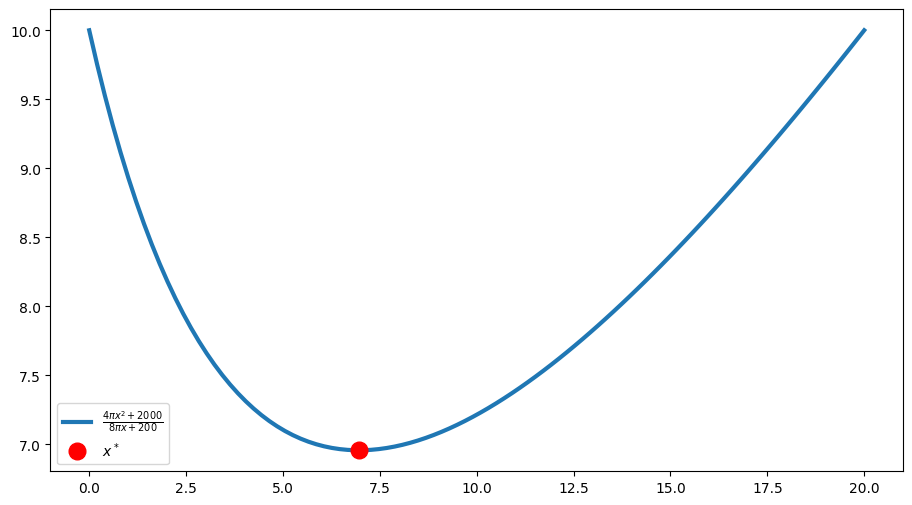

In [4]:
import matplotlib.pyplot as plt
import numpy as np
    
def plot_height(h, s, start, stop, width=11, height=6):

    plt.rcParams["figure.figsize"] = (width,height)

    x = sympy.Symbol('x')
    f = sympy.lambdify(x, h.subs( pi, math.pi))

    x = np.linspace(start=start,stop=stop,num=100) 
    y = f(x)

    plt.plot(x,y,label='$'+sympy.latex(h)+'$',linewidth=3)
    plt.plot(s,f(s), 'ro', label='$x^*$', markersize=12)

    plt.legend()
    plt.show() 
    
plot_height(h, s, 0, 20)

## Beyond the analytical solution

In general, constrained optimization problems have much more involved, complicated, and high-dimensional feasible regions and/or non-differentiable objective functions. For this reason, it makes sense to frame and solve problem differently using techniques from mathematical optimization. The way we implement and numerically solve these optimization problems in Python is using the `Pyomo` package. `Pyomo` has the advantage of completely separating modeling from solving, which allows us to switch solver without recoding a problem to scratch! 

In [5]:
import pyomo.environ as pyo

model = pyo.ConcreteModel('Rose')
model.h = pyo.Var(bounds=(0,20))

@model.Objective(sense=pyo.minimize)
def cog(m):
    return (4*math.pi*model.h**2 + 2000)/(8*math.pi*model.h + 200)

model.pprint()

1 Var Declarations
    h : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :    20 : False :  True :  Reals

1 Objective Declarations
    cog : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : (12.566370614359172*h**2 + 2000)/(25.132741228718345*h + 200)

2 Declarations: h cog


We will use `ipopt` as solver, which is a generic solver for non-linear problems. In case you are using Google Colab, we refer again to [this notebook](https://nbviewer.jupyter.org/github/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/01.02-Running-Pyomo-on-Google-Colab.ipynb) to learn how to run `Pyomo` and how to install solvers on Google Colab. For a complete overview of `Pyomo` please check the [cookbook](https://jckantor.github.io/ND-Pyomo-Cookbook/).

In [6]:
results = pyo.SolverFactory('ipopt').solve(model)
print("Solver status:",results.solver.status," Solver termination condition:",results.solver.termination_condition )
model.display()

Solver status: ok  Solver termination condition: optimal
Model Rose

  Variables:
    h : Size=1, Index=None
        Key  : Lower : Value            : Upper : Fixed : Stale : Domain
        None :     0 : 6.95803921230998 :    20 : False : False :  Reals

  Objectives:
    cog : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 6.95803920980307

  Constraints:
    None


## Conclusions

This notebook shows how to solve the rose problem: finding the most stable amount of water in a glass. 

The notebook shows how to solve the problem analytically with `sympy`, how to use `matplotlib` to visualize the function and the optimum, and how to model the rose problem using `Pyomo` and solve it with `ipopt`.